In [10]:
import os
from utils import DataLoader, Ontonotes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
pd.set_option('display.max_colwidth', -1)

# Dataset from Kaggle

In [2]:
class Cfg:
    pass
cfg = Cfg()  # Create an empty configuration
cfg.DEBUG = False

FOLDER_DATA = 'gap_coreference'
if not os.path.exists(FOLDER_DATA):
   raise NotImplementedError
cfg.TRAINING_PATH = os.path.join(FOLDER_DATA, 'gap-test.tsv')
cfg.VAL_PATH = os.path.join(FOLDER_DATA, 'gap-validation.tsv')

data_training = DataLoader(cfg.TRAINING_PATH, 1, shuffle=True, debug=cfg.DEBUG)
#data_eval = DataLoader(cfg.VAL_PATH, 1, shuffle=True, debug=cfg.DEBUG)

In [3]:
columns = ['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B', 'B-offset', 'label']
df = pd.DataFrame(columns=columns)
for i, (X, Y) in enumerate(data_training):
    X.loc[:,'label'] = pd.Series(Y, index=X.index)
    df = df.append(X)
df.iloc[:10]

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,label
134,test-135,"On his last European start Lorenzaccio ran in his second Champion Stakes at Newmarket in October. The favourite was the outstanding three-year-old colt Nijinsky, who had become the first Triple Crown winner for thirty-five years and beaten older horses in the King George VI and Queen Elizabeth Stakes. Although he had been narrowly beaten by Sassafras in the Prix de l'Arc de Triomphe, Nijinsky, ridden by Piggott, was expected to redeem his reputation and started at odds of 4/11 while Lorenzaccio, ridden by Geoff Lewis was a 100/7 outsider.",he,312,King George VI,260,Piggott,407,2
356,test-357,"CFBHOF_year = )) Mickey Andrews is an American college football coach. He was the Associate Head Coach and Defensive coordinator at Florida State University beginning his career in 1984. Andrews retired, along with Bobby Bowden, at the end of the 2009 season and coached his final game in Florida State's victory over West Virginia on January 1, 2010, in the Gator Bowl.",his,271,Andrews,187,Bobby Bowden,215,0
1339,test-1340,"An enormous party ensues, where everyone sings ``It's All Too Much'' with everyone living happily ever after. At the end, we see the real Beatles in live-action, having returned home, playfully showing off their souvenirs: George has the submarine's motor, Paul has ``a little 'LOVE''' and Ringo still has half a hole in his pocket (having supposedly given the other half to Jeremy, which Paul offers to fix ``to keep his mind from wandering'', a reference to ``Fixing a Hole'').",his,321,Paul,257,Ringo,290,1
1821,test-1822,"The video begins with the ending instrumental to ``Enter the circus''/``Welcome'', over which a carnival barker (voiced by Linda Perry) introduces a spectacular circus, and begins in black and white. The transition to colour begins when Aguilera appears in an old fashioned dressing room, receiving flowers and then an important telegram. A flashback then shows young Aguilera, played by Laci Kay, with her father, played by Timothy V. Murphy, raptured by the sight of the tightrope walker, played by Elizabeth Glassco.",her,403,Aguilera,368,Laci Kay,388,0
429,test-430,"Sexy Susan Sins Again (German: Frau Wirtin hat auch einen Grafen, Italian: Susanna... ed i suoi dolci vizi alla corte del re) is a 1968 Austrian-Italian costume drama-adventure-sex comedy film directed by Franz Antel. It is the first film of the series Frau Wirtin, following the 1967 film The Sweet Sins of Sexy Susan. Susanne Delberg (Teri Tordai as Terry Torday) and her friend Ferdinand (Harald Leipnitz) are assigned by Count Andrea (B*la Ernyey) to deliver some documents to his brother Enrico (Jeffrey Hunter), in order to save their family assets from Leduc (Jacques Herlin), the counsellor of Elisa Bonaparte (Pascale Petit).",her,370,Susanne Delberg,320,Teri Tordai,337,0
1393,test-1394,"In 1812 Susan purchased two new properties for the family: Canonteign House, where her eldest son Pownoll lived with his wife Eliza, and West Cliffe House (now Bitton House) in Teignmouth where she and her husband resided after his retirement, with various children and grandchildren, until his death in 1833. Susan disapproved of the posthumous biography of Pellew, commissioned by his brother Samuel and written by Edward Osler, and she burned the majority of her husband's personal correspondence.",she,435,Susan,310,Pellew,359,0
1793,test-1794,"Gloucester married secondly, on 30 April 1290, Joan of Acre, daughter of Prince Edward who had acceeded in 1272 as King Edward I of England. Alice died in May 1290. Through her daughter Joan, Alice was the grandmother of Isabella MacDuff, Countess of Buchan, who placed the crown of Scotland upon the head of Robert the Bruce at Scone.",her,173,Joan,186,Alice,192,1
1689,test-1690,"Angell married Alice Ashton, the daughter of James Ashton of Saint Albans in Hertfordshire, England. Alice's sister Mary married Thomas Olney, another Providence settler, an

# Dataset from Ontonotes

In [5]:
class Cfg:
    pass
cfg = Cfg()  # Create an empty configuration
cfg.DEBUG = False

FOLDER_DATA = 'ontonotes/coref_jiant'
if not os.path.exists(FOLDER_DATA):
   raise NotImplementedError
cfg.TRAINING_PATH = os.path.join(FOLDER_DATA, 'train.json')
#cfg.VAL_PATH = os.path.join(FOLDER_DATA, 'development.json')

data_training = Ontonotes(cfg.TRAINING_PATH, 1, debug=cfg.DEBUG)
#data_eval = Ontonotes(cfg.VAL_PATH, 1, debug=cfg.DEBUG)

In [6]:
columns = ['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B', 'B-offset', 'label']
df_ontonotes = pd.DataFrame(columns=columns)
for i, (X, Y) in enumerate(data_training):
    X.loc[:,'label'] = pd.Series(Y, index=X.index)
    df_ontonotes = df_ontonotes.append(X)
df_ontonotes.iloc[:10]

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,label
0,NA,"Mr. Nahas , who single - handedly provoked a one - day closure of Brazil 's stock markets in June when he failed to honor a debt of $ 31.1 million owed to his brokers , yesterday blamed his predicament on the president of the Sao Paulo stock exchange ; a few days before Mr. Nahas 's failure , the exchange raised the required margin on stock - margin transactions .",his,155,failed,106,the exchange,294,0
0,NA,"`` I consider this a second career , '' he said .",he,40,this,14,I,3,2
0,NA,"As they were throwing the stones at him , Stephen was praying .",him,36,Stephen,42,they,3,1
0,NA,Jesus and his followers went across the lake and came to shore at Gennesaret .,his,10,Jesus and his followers,0,the lake,36,0
0,NA,Ashcroft said his recent loss in the U.S. Senate race has given him time to reflect .,him,64,Ashcroft,0,his recent loss in the U.S. Senate race,14,1
0,NA,"This is a revelation from Jesus Christ , which God gave him to show his servants what must happen soon .",him,56,"a revelation from Jesus Christ , which God gave him to show his servants what must happen soon",8,Jesus Christ,26,2
0,NA,"While the Warren County congressman pursued an anti-government , anti-tax agenda in Washington , Gov. Kean was approving increased income and sales taxes at home and overseeing a near doubling in the size of New Jersey 's budget in his eight years in office .",his,232,the Warren County congressman,6,Gov. Kean,97,2
0,NA,"abby , always the cool head , rolled down her window -LRB- and was immediately rewarded with a lapful of still warm poop -RRB- , allowing me to slither over onto the shoulder of the road in an almost controlled manner .",her,42,abby,0,me,138,1
0,NA,"Just an hour earlier , her sister was shot on the head by suspected left wing guerillas .",her,23,her sister,23,suspected left wing guerillas,58,0
0,NA,"Yet the heavy - handedness of the satire also can be effective in a book like this : If the head of AIW were not portrayed as an utterly contemptible , malicious dolt , we would not much care whether his schemes were defeated , and would not be so diverted in the process .",his,200,this,78,the head of AIW,88,2


# Analysis

<IPython.core.display.Javascript object>


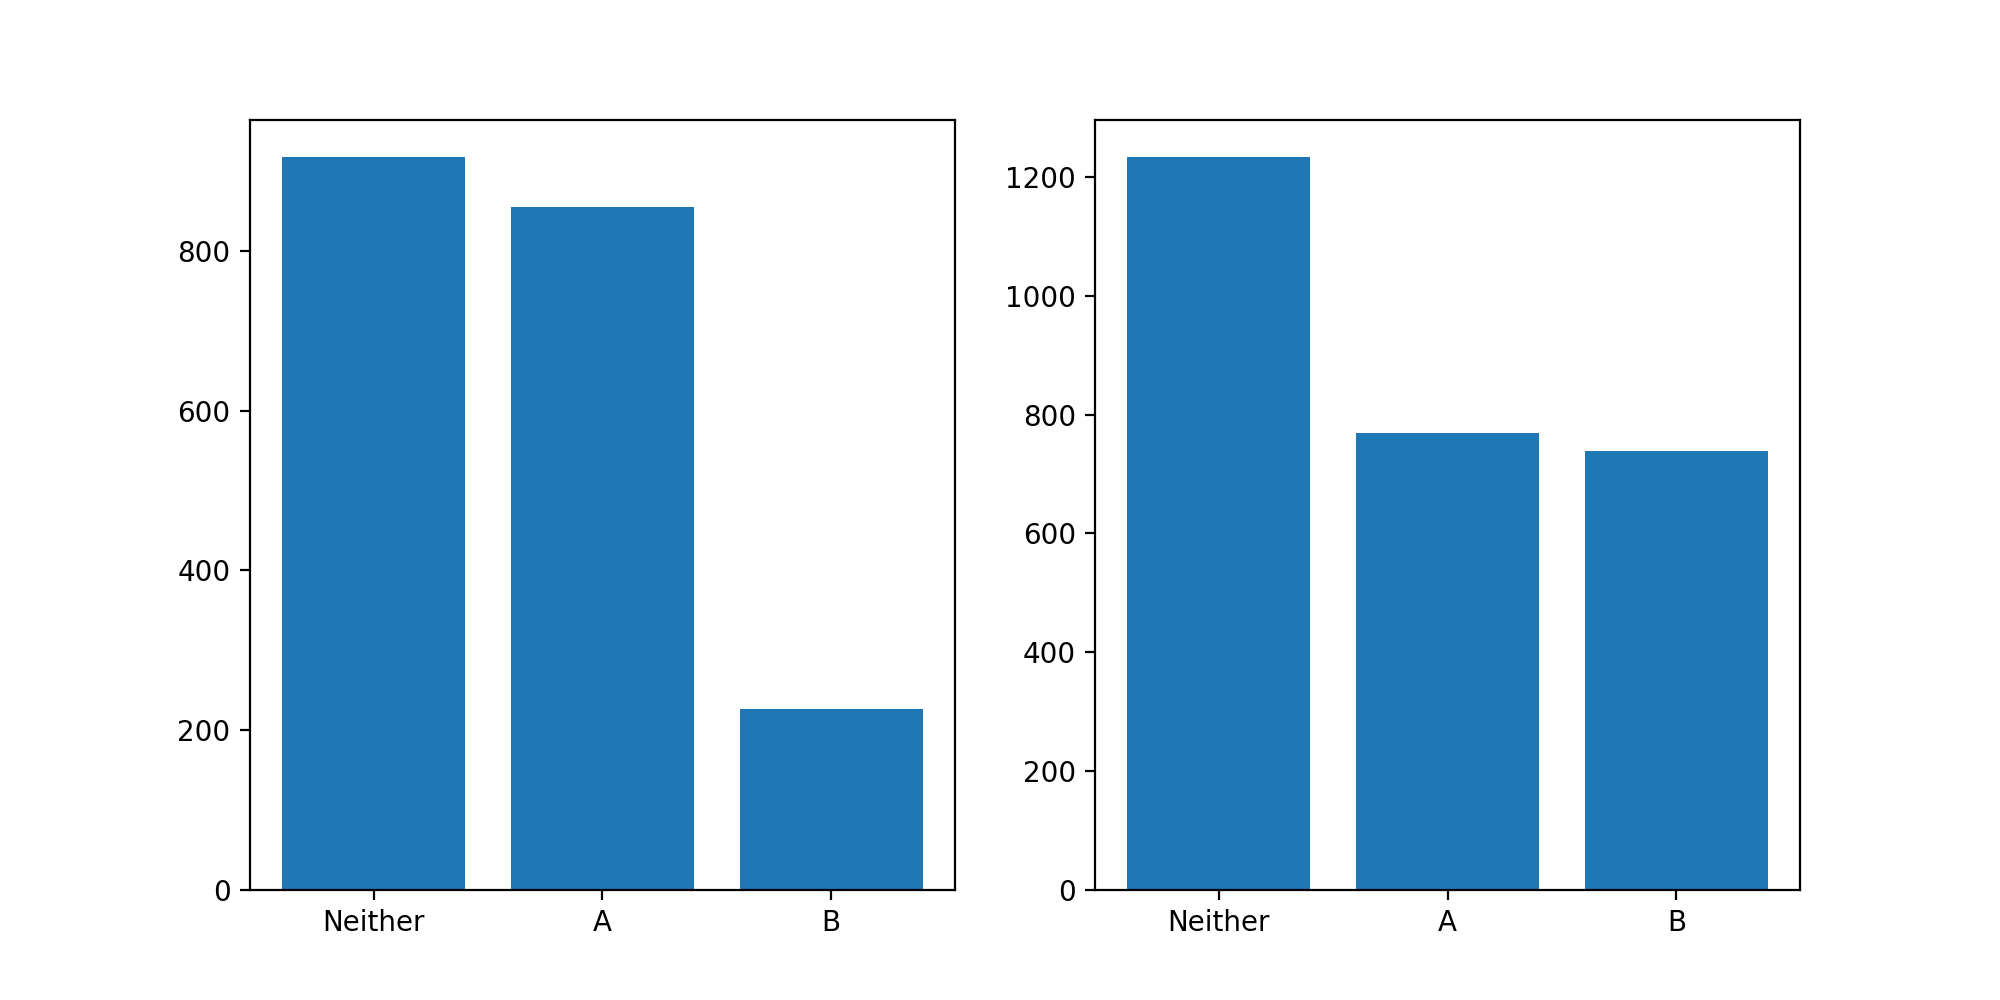

In [18]:
_, axs = plt.subplots(1,2, figsize=(10, 5))
temp = df.label.value_counts()
axs[0].bar(x=['Neither', 'A', 'B'], height=temp)
temp = df_ontonotes.label.value_counts()
axs[1].bar(x=['Neither', 'A', 'B'], height=temp)
plt.show()

<IPython.core.display.Javascript object>


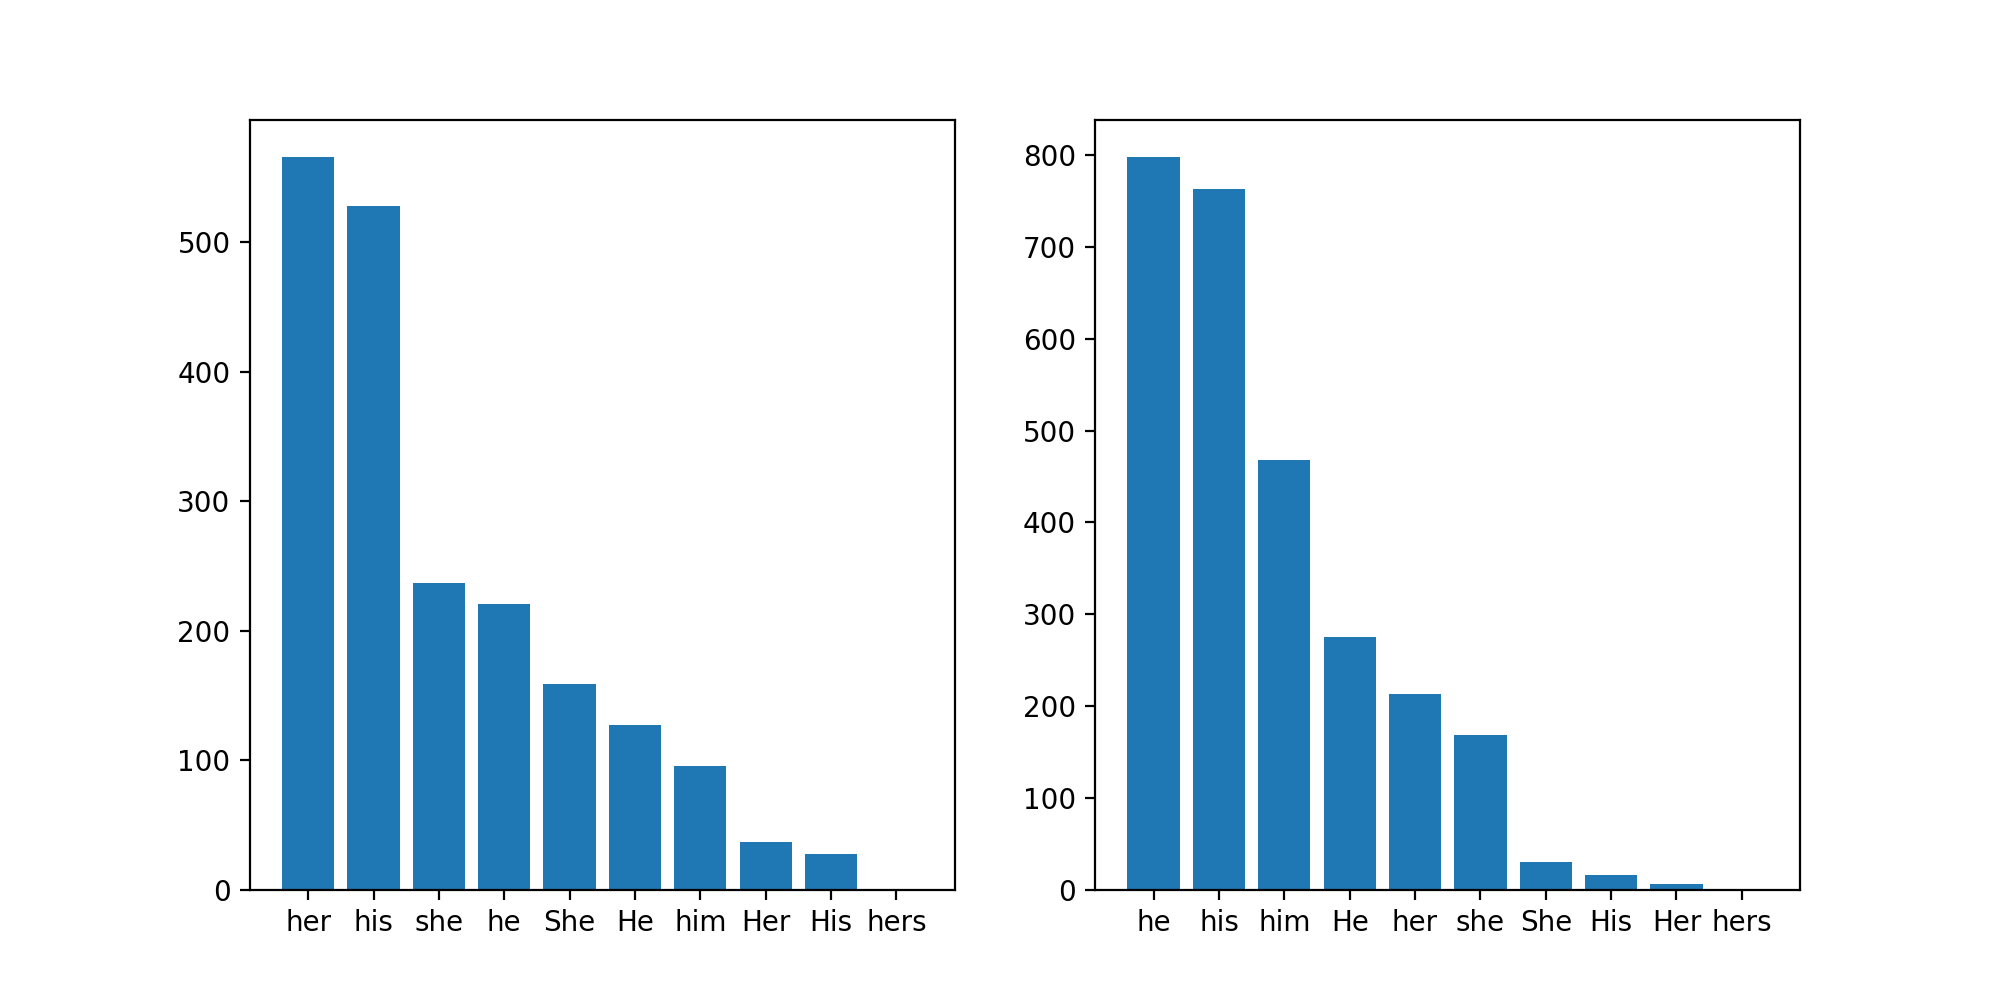

In [20]:
_, axs = plt.subplots(1,2, figsize=(10, 5))
temp = df.Pronoun.value_counts()
axs[0].bar(x=temp.index.values, height=temp)
temp = df_ontonotes.Pronoun.value_counts()
axs[1].bar(x=temp.index.values, height=temp)
plt.show()

<IPython.core.display.Javascript object>


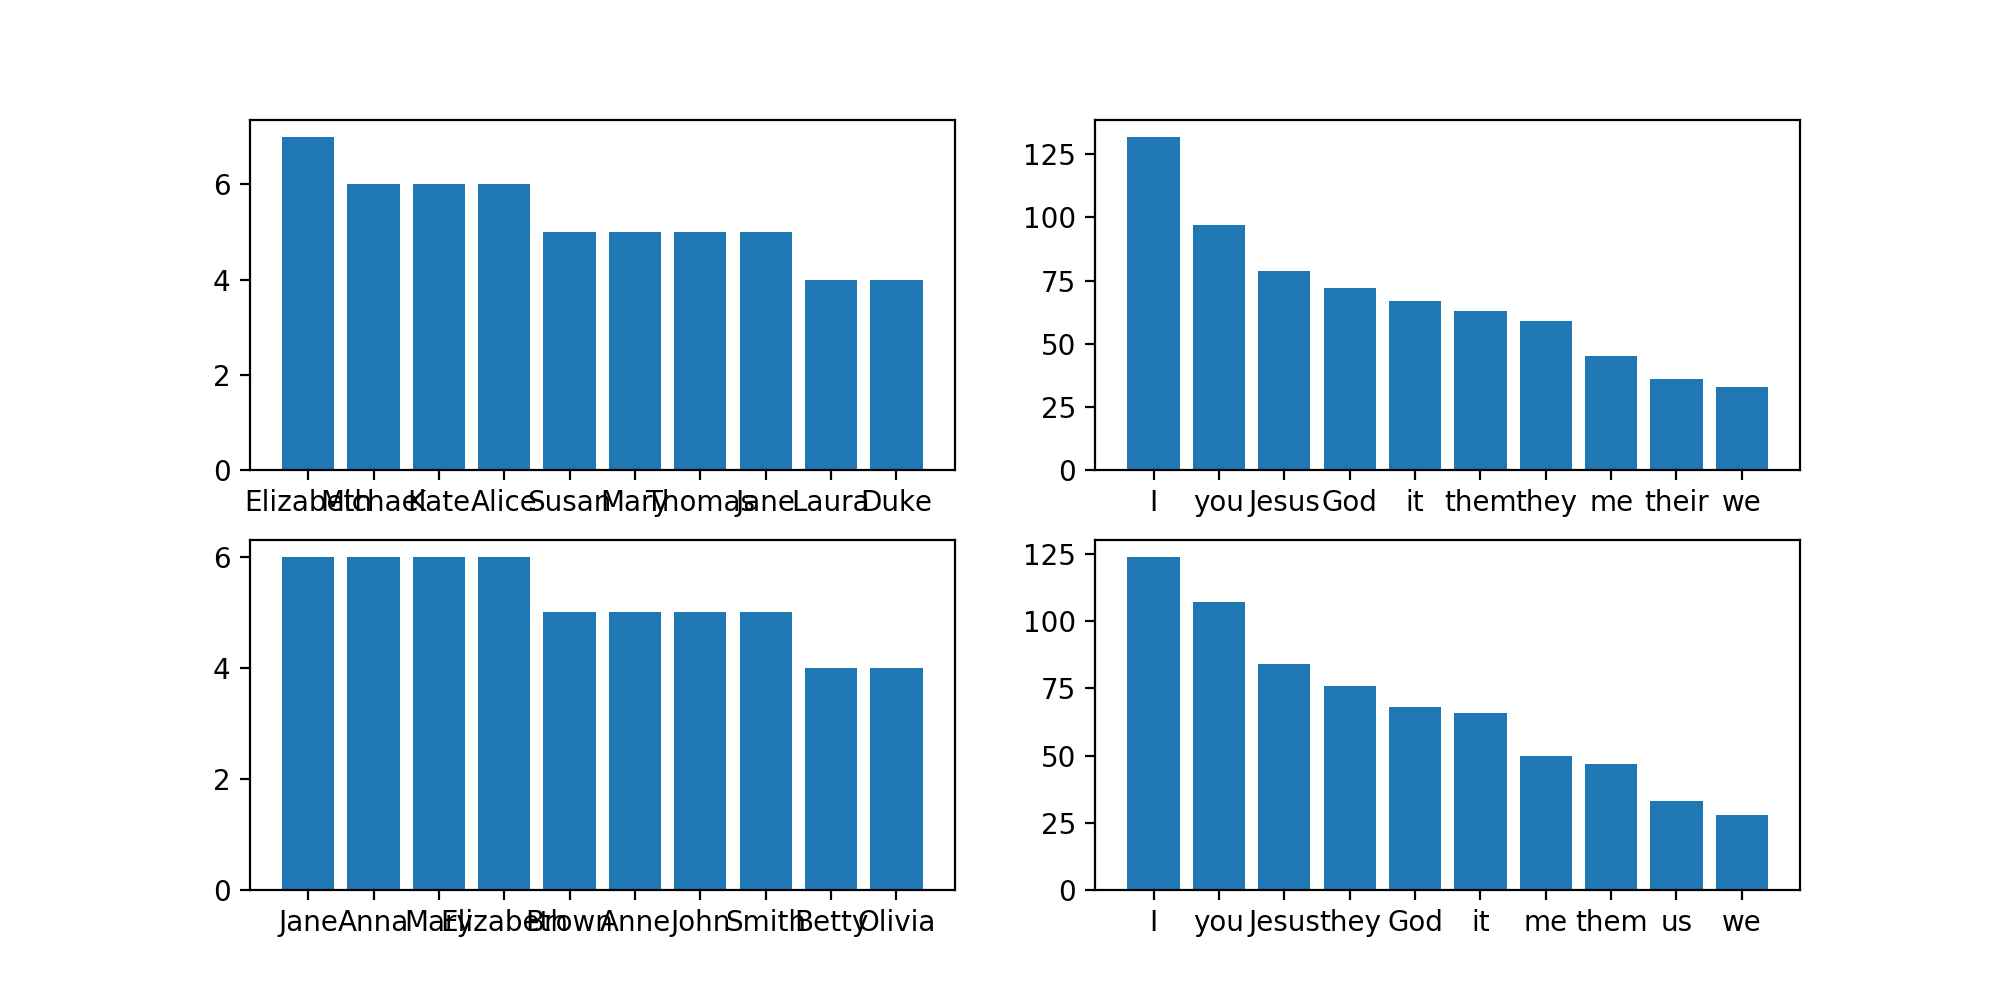

In [19]:
_, axs = plt.subplots(2,2, figsize=(10, 5))
temp = df.A.value_counts().iloc[:10]
axs[0,0].bar(x=temp.index.values, height=temp)
temp = df.B.value_counts().iloc[:10]
axs[1,0].bar(x=temp.index.values, height=temp)
temp = df_ontonotes.A.value_counts().iloc[:10]
axs[0,1].bar(x=temp.index.values, height=temp)
temp = df_ontonotes.B.value_counts().iloc[:10]
axs[1,1].bar(x=temp.index.values, height=temp)
plt.show()